## Data Visualization
#### simple analysis (numerical features).

In [1]:
#numeric
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from IPython.display import Image

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#  The data. 
Data download of Machine Learning Repository: Wisconsin breast cancer diagnostic data set.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

The examples with missing values in original file were eliminated

### The file is spreadsheet with colums 
1. ID - identification number 
2. Diagnosis (M = malignant, B = benign) 
3. 32- Measurements describing characteristics of the cell nuclei present in the image.: a)radius (mean of distances from center to points on the perimeter); b)texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g)concavity (severity of concave portions of the contour) h)concave points (number of concave portions of the contour) i)symmetry j)fractal dimension The mean, standard deviation and maximum (or mean of the 3 largest??) of the image form the 30 features.

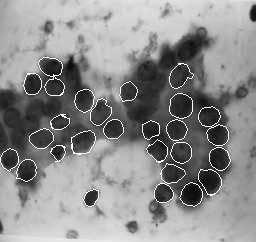

In [3]:
Image(filename='FIG/pictdata.png', width=800) 

In [4]:
df = pd.read_csv("data/wdbcBBB.csv",header = 0)
df.head()


,ID,diagnosis,r-mean,t-mean,per-mean,ar-mean,sm-mean,cm-mean,cn-mean,nc-mean,...,r-w,t-w,per-w,ar-w,sm-w,cm-w,cn-w,nc-w,sym-w,fc-w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The first column is not informative (can be removed)
And the second column is the label.
An Overview of the data.

In [5]:
df.drop('ID',axis=1,inplace=True)
print(df.describe())


           r-mean      t-mean    per-mean      ar-mean     sm-mean  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

          cm-mean     cn-mean     nc-mean    sym-mean   frac-mean  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   

# QUESTIONS:
    1)- How large is the data set?
    2)- What is the range of radius of the cell nucleus?
    3)- What is the range of the texture of cell nucleus?
    
    Note that the feature are represented in different ranges...
  

# Question: 
    1) How many classes?
    The label .....

In [6]:
print(df.diagnosis.unique())

['M' 'B']


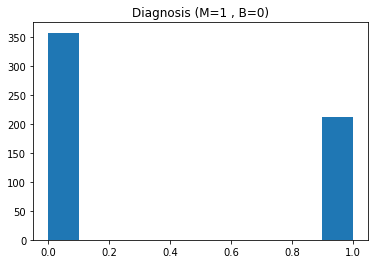

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
a=df['diagnosis']
plt.hist(a)
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

# Question:
    1)- The data set in non-balanced.
            How many examples in each class?            

## Studying the values of the features within the classes.
Starting with the mean of each measurement: reading the first 12 features of the data set

In [8]:
features_mean=list(df.columns[1:13])
print(features_mean)


['r-mean', 't-mean', 'per-mean', 'ar-mean', 'sm-mean', 'cm-mean', 'cn-mean', 'nc-mean', 'sym-mean', 'frac-mean', 'r-std', 't-std']


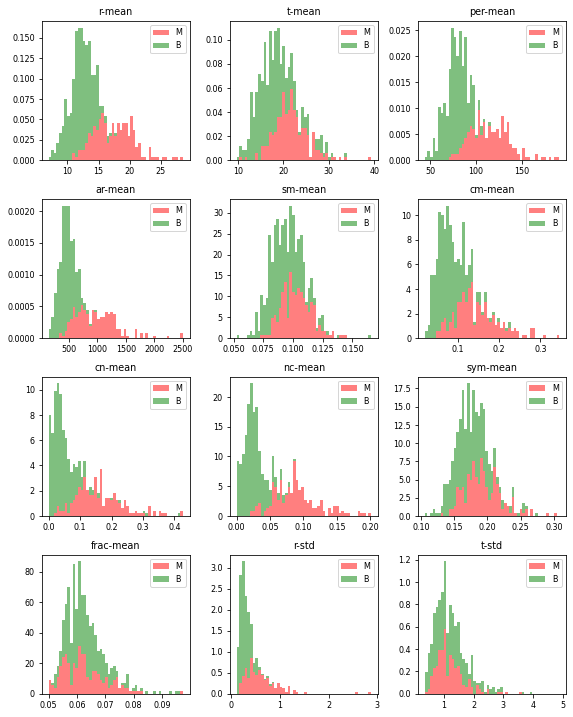

In [9]:
# Separating the data 
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]
#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8,10))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density= True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

# Question:
Observe the histograms

If you consider to take a decision about the class  using 
$feature_i$ > $\alpha$   then is Maligna ('M')

1) What are features you could consider?
2) And the value of $\alpha$ is easy to estimate? 
3) Identify the non-discriminative features.

Boxplots : an alternative overview of the features

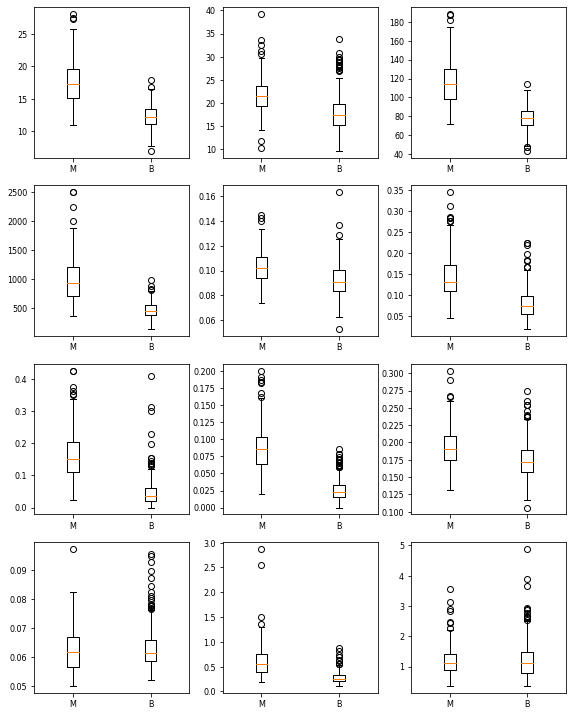

In [10]:
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]
#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8,10))
axes = axes.ravel()
#BOXPLOTS
for idx,ax in enumerate(axes):
    ax.figure
    data_to_plot = [dfM[features_mean[idx]],dfB[features_mean[idx]]]
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(['M', 'B'])
    
plt.tight_layout()
plt.show()    

# Question:

Compare the boxplots with the histograms. Comment the results
1) Which of the features has more outliers?
2) The median is different between the two classes?


Note: See the definition of a bloxplot:
    http://stattrek.com/statistics/charts/boxplot.aspx

In [11]:
#Repeating the features list
features_mean=list(df.columns[1:11])
print(features_mean)

['r-mean', 't-mean', 'per-mean', 'ar-mean', 'sm-mean', 'cm-mean', 'cn-mean', 'nc-mean', 'sym-mean', 'frac-mean']


Scatter plots between pairs of features:
M- red; B- green

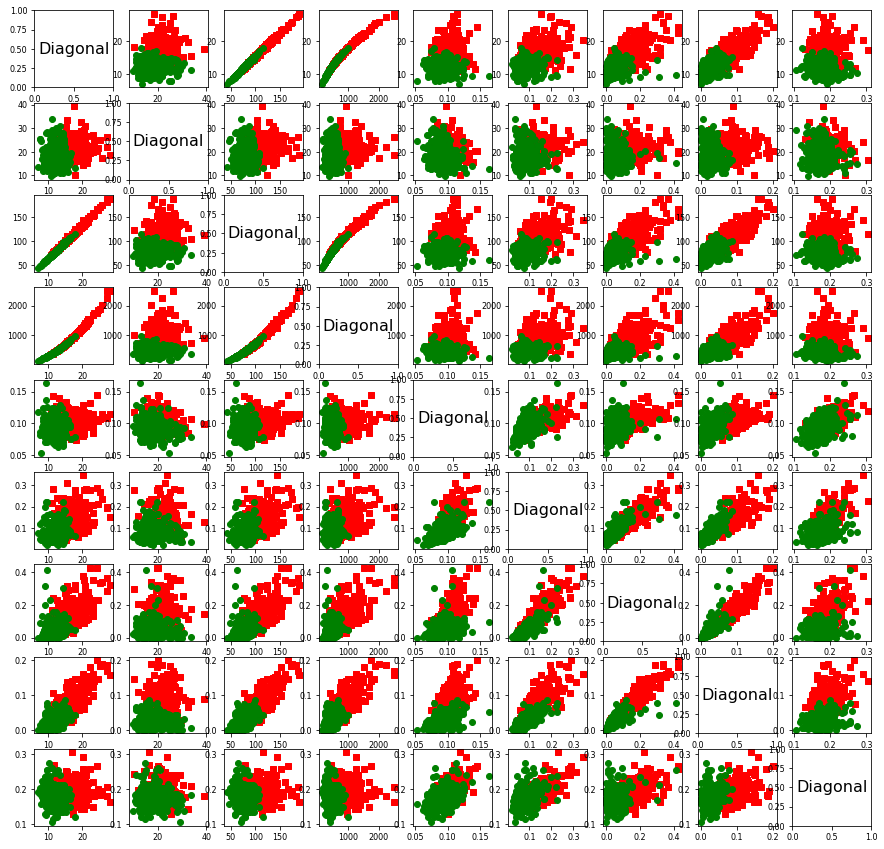

In [12]:


dfM=df[df['diagnosis'] ==1]
#print(dfM)
dfB=df[df['diagnosis'] ==0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=9, ncols=9, figsize=(15,15))
#fig, axes = plt.subplots(nrows=d, ncols=d, sharex=True, sharey=True)
for i in range(9):
    for j in range(9):
        ax = axes[i,j]
        ax.figure
        if i == j:
            ax.text(0.5, 0.5, "Diagonal", transform=ax.transAxes,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=16)
        else:
            ax.scatter(dfM[features_mean[j]],dfM[features_mean[i]],marker='s',color='r',label='M')  
            #hold(True)
            ax.scatter(dfB[features_mean[j]],dfB[features_mean[i]],marker='o',color='g',label='B')    

       
           
plt.show()

# Question: 

Observe the scatter plots and qualitatively
1.  Can you identify regions of x-y plane where "M" and "B" classes are dominant?
2. - Which pair of features is the least discriminative?

 Note: For each pair of features there are two plots. 

